# Springboard Ultimate Challenge Excercise 1
# Submitted by Calanit Kamala


In [2]:
# import statements
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [12]:
# Loading and exploring the data

logins_df = pd.read_json('/Users/user/Desktop/ultimate_challenge/logins.json')
logins_df.head(20)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [13]:
logins_df.shape

(93142, 1)

In [14]:
# creating an event variable to make aggregation of logins by time easier

logins_df['event'] = 1

In [15]:
# Exploring the new data frame
logins_df.head()

,login_time,event
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [16]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
 1   event       93142 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 MB


# EDA

In [17]:
# Aggregating data by 15-minute inetrvals
minute_data = pd.DataFrame(logins_df.set_index('login_time').resample('15min').sum())

In [54]:
minute_data.head(10)

,event
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


In [19]:
#Making sure the aggregated data reflects original number of logins 93142
minute_data['event'].sum()

93142

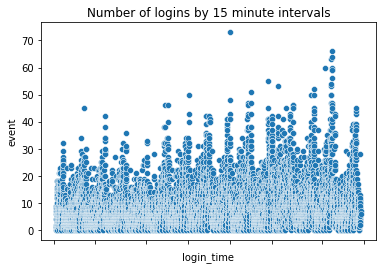

In [20]:
g_minute = sns.scatterplot(data = minute_data, x='login_time', y='event')
g_minute.set(xticklabels=[])
g_minute.set(title = 'Number of logins by 15 minute intervals')
plt.show()

In [48]:
# Aggregating data by hour

hourly_data = pd.DataFrame(logins_df.set_index('login_time').resample('1H').sum())

In [49]:
hourly_data.head()

,event
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53


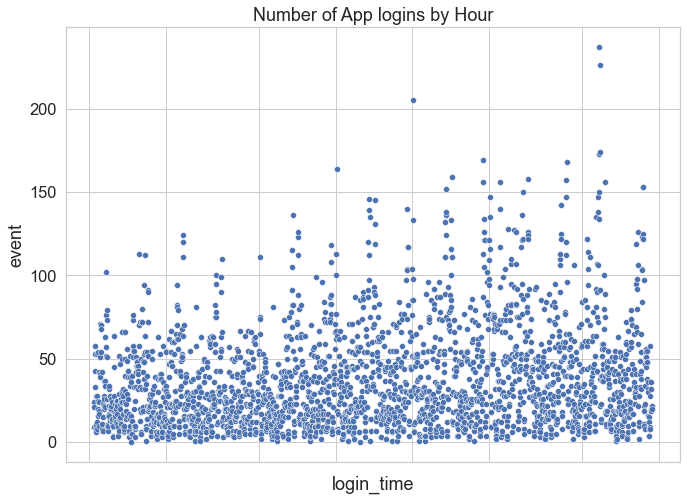

In [43]:
g_hourly = sns.scatterplot(data = hourly_data, x='login_time', y='event')
g_hourly.set(xticklabels=[])
g_hourly.set(title = 'Number of App logins by Hour')
plt.show()

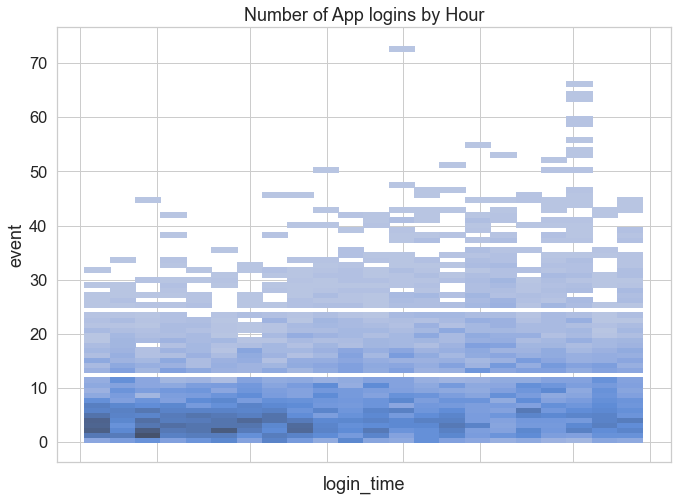

In [46]:
g_hourly = sns.histplot(data = minute_data, x='login_time', y='event')
g_hourly.set(xticklabels=[])
g_hourly.set(title = 'Number of App logins by Hour')
plt.show()

In [21]:
# Aggregating data by day
daily_data = pd.DataFrame(logins_df.set_index('login_time').resample('1D').sum())

In [55]:
daily_data

,login_time,event
0,1970-01-01,112
1,1970-01-02,681
2,1970-01-03,793
3,1970-01-04,788
4,1970-01-05,459
...,...,...
98,1970-04-09,818
99,1970-04-10,1009
100,1970-04-11,1352
101,1970-04-12,1409


In [27]:
daily_data.shape

(103, 1)

In [23]:
#Making sure the aggregated data reflects original number of logins 93142
daily_data['event'].sum()

93142

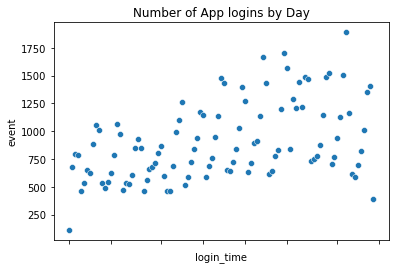

In [24]:
g_daily = sns.scatterplot(data = daily_data, x='login_time', y='event')
g_daily.set(xticklabels=[])
g_daily.set(title = 'Number of App logins by Day')
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='event'>

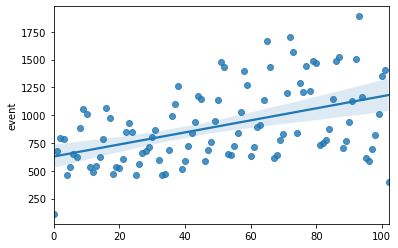

In [25]:
# The data exhibits slight upward trend, to confirm, plotting a quick plot using sns
daily_df = daily_data.reset_index()
sns.regplot(daily_df.index, daily_df['event'], data=daily_df)

In [28]:
#Preparing the data to graph by day of the week to get some more insight

daily_data = daily_data.reset_index()

In [29]:
daily_df['weekday'] = daily_df['login_time'].dt.dayofweek                # getting day of week associated with each date
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
daily_df['weekday'] = daily_df['weekday'].apply(lambda x: days[x])           # renaming categorical dayofweek data with day names


In [30]:
daily_df.head(10)

,login_time,event,weekday
0,1970-01-01,112,Thursday
1,1970-01-02,681,Friday
2,1970-01-03,793,Saturday
3,1970-01-04,788,Sunday
4,1970-01-05,459,Monday
5,1970-01-06,536,Tuesday
6,1970-01-07,648,Wednesday
7,1970-01-08,625,Thursday
8,1970-01-09,881,Friday
9,1970-01-10,1054,Saturday


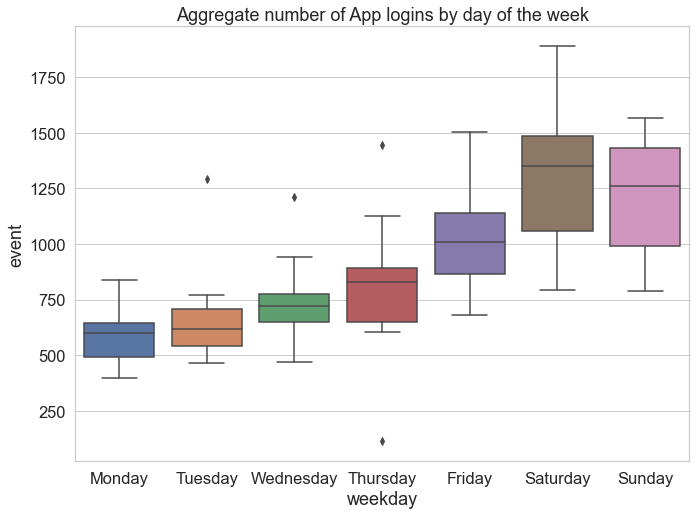

In [32]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] #setting day order for boxplot

sns.set(rc={'figure.figsize': (11,8)}, font_scale = 1.5, style = 'whitegrid')

g_dow = sns.boxplot(x='weekday', y='event', data = daily_df, order=order)

g_dow.set(title = 'Aggregate number of App logins by day of the week')

plt.show()

[Text(0.5, 1.0, 'Swarm plot of aggregate number of App logins by day of week')]

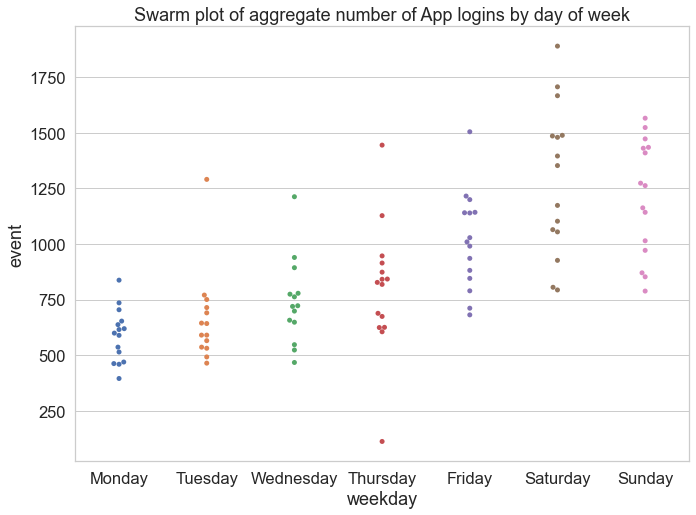

In [33]:
g_dow2 = sns.swarmplot(x='weekday', y='event', data = daily_df, order=order)
g_dow2.set(title = 'Swarm plot of aggregate number of App logins by day of week')

In [ ]:
# Looking at the data by day of the week, there is a strong apparent trend of increasing App logins as we move 
# from Monday to the weekend with Saturday being the busiest day. 
#The variability of logins is also the highest on Saturday. 

In [51]:
# Preparing the data for aggregation by hour of the day
hourly_df = hourly_data.reset_index()
hourly_df['hour_of_day'] = hourly_df['login_time'].dt.hour             # getting hour of day associated with each date
hourly_df.head(10)

,login_time,event,hour_of_day
0,1970-01-01 20:00:00,24,20
1,1970-01-01 21:00:00,9,21
2,1970-01-01 22:00:00,21,22
3,1970-01-01 23:00:00,58,23
4,1970-01-02 00:00:00,53,0
5,1970-01-02 01:00:00,33,1
6,1970-01-02 02:00:00,43,2
7,1970-01-02 03:00:00,28,3
8,1970-01-02 04:00:00,9,4
9,1970-01-02 05:00:00,11,5


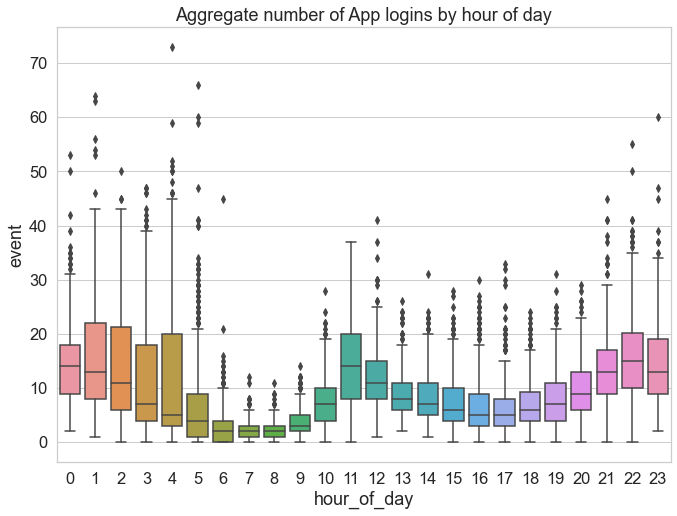

In [52]:
sns.set(rc={'figure.figsize': (11,8)}, font_scale = 1.5, style = 'whitegrid')

g_hour = sns.boxplot(x='hour_of_day', y='event', data = minute_df.sort_values(by='hour_of_day'))

g_hour.set(title = 'Aggregate number of App logins by hour of day')

plt.show()